In [10]:
import pandas as py
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [11]:
Groceries_dataset = pd.read_csv("Groceries_dataset.csv")
Groceries_dataset

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [12]:
Groceries_dataset.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [13]:
Groceries_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [14]:
Groceries_dataset.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [15]:
Groceries_dataset.sum()

Member_number                                              116436177
Date               21-07-201505-01-201519-09-201512-12-201501-02-...
itemDescription    tropical fruitwhole milkpip fruitother vegetab...
dtype: object

In [16]:
import pandas as pd
file_path = "Groceries_dataset.csv"
df = pd.read_csv(file_path)

duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Optionally, remove duplicates
df_no_duplicates = df.drop_duplicates()

# Save cleaned dataset
df_no_duplicates.to_csv("Groceries_dataset_cleaned.csv", index=False)

print("Cleaned dataset saved as Groceries_dataset_cleaned.csv")

Duplicate Rows:
       Member_number        Date   itemDescription
5015            2051  11-09-2015       frankfurter
5022            3055  18-08-2015  other vegetables
5044            1994  11-03-2015        whole milk
5055            1682  25-06-2015         pip fruit
5059            4324  05-01-2015           sausage
...              ...         ...               ...
38614           2027  26-02-2014     domestic eggs
38684           2936  07-03-2014        newspapers
38685           2311  13-03-2014        pot plants
38722           3834  18-05-2014       salty snack
38723           1146  23-05-2014            yogurt

[759 rows x 3 columns]
Cleaned dataset saved as Groceries_dataset_cleaned.csv


In [17]:
import pandas as pd
file_path = "Groceries_dataset.csv"
df = pd.read_csv(file_path)

duplicates = df[df.duplicated()]
print("Duplicate Columns:")
print(duplicates)

# Optionally, remove duplicates
df_no_duplicates = df.drop_duplicates()

# Save cleaned dataset
df_no_duplicates.to_csv("Groceries_dataset_cleaned.csv", index=False)

print("Cleaned dataset saved as Groceries_dataset_cleaned.csv")

Duplicate Columns:
       Member_number        Date   itemDescription
5015            2051  11-09-2015       frankfurter
5022            3055  18-08-2015  other vegetables
5044            1994  11-03-2015        whole milk
5055            1682  25-06-2015         pip fruit
5059            4324  05-01-2015           sausage
...              ...         ...               ...
38614           2027  26-02-2014     domestic eggs
38684           2936  07-03-2014        newspapers
38685           2311  13-03-2014        pot plants
38722           3834  18-05-2014       salty snack
38723           1146  23-05-2014            yogurt

[759 rows x 3 columns]
Cleaned dataset saved as Groceries_dataset_cleaned.csv


In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
file_path = "Groceries_dataset.csv"
df = pd.read_csv(file_path)

# Convert the dataset into a transaction format
grouped = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
transactions = grouped.tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Save results
frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)
rules.to_csv("association_rules", index=False)

print("Frequent itemsets and association rules ")


Frequent itemsets and association rules 


In [22]:
df = pd.read_csv("association_rules.csv")

In [23]:
df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


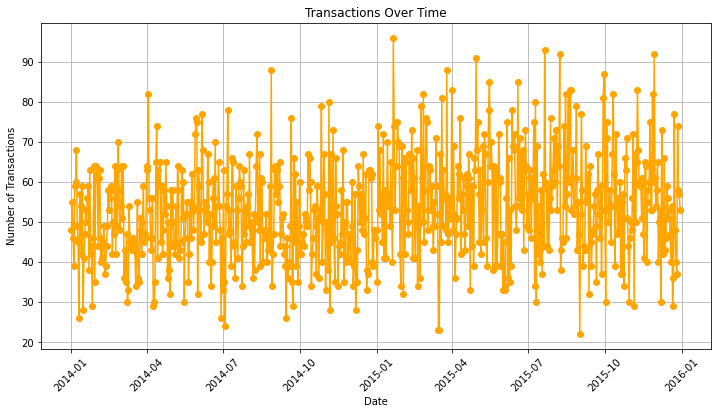

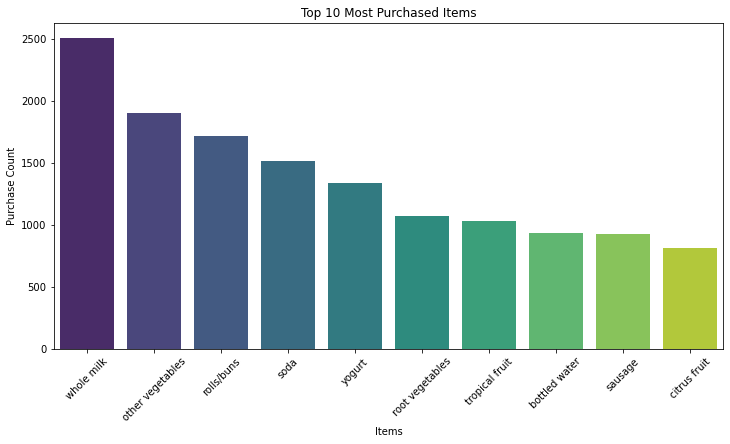

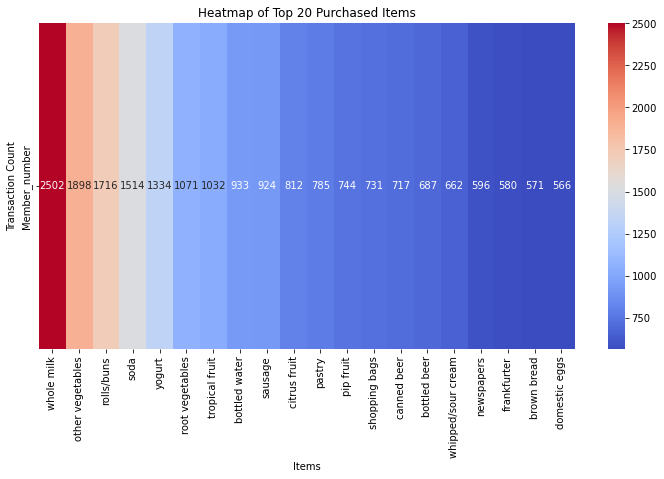

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Groceries_dataset.csv"  
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


transactions_per_day = df.groupby('Date').size()

plt.figure(figsize=(12, 6))
plt.plot(transactions_per_day.index, transactions_per_day.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

top_items = df['itemDescription'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.xlabel("Items")
plt.ylabel("Purchase Count")
plt.title("Top 10 Most Purchased Items")
plt.xticks(rotation=45)
plt.show()

item_counts = df.pivot_table(index="itemDescription", values="Member_number", aggfunc="count").fillna(0)
item_counts = item_counts.sort_values(by="Member_number", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.heatmap(item_counts.T, cmap="coolwarm", annot=True, fmt="g")
plt.title("Heatmap of Top 20 Purchased Items")
plt.xlabel("Items")
plt.ylabel("Transaction Count")
plt.show()

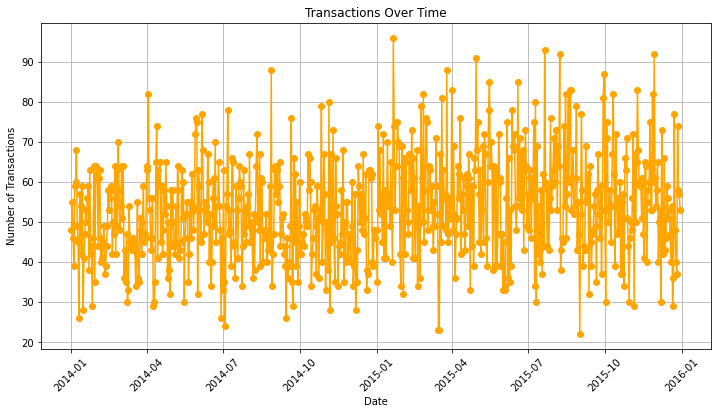

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Groceries_dataset.csv"  
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


transactions_per_day = df.groupby('Date').size()

plt.figure(figsize=(12, 6))
plt.plot(transactions_per_day.index, transactions_per_day.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

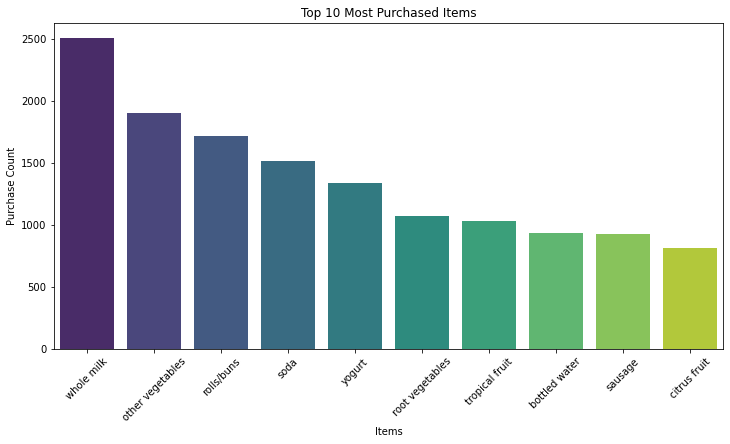

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Groceries_dataset.csv"  
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
top_items = df['itemDescription'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.xlabel("Items")
plt.ylabel("Purchase Count")
plt.title("Top 10 Most Purchased Items")
plt.xticks(rotation=45)
plt.show()